<a href="https://colab.research.google.com/github/ShravanJadhav/CustomerPersonality_Analysis/blob/main/CustomerPersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#Read the data
dataset = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')

In [3]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
dataset.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
dataset.shape

(2240, 29)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
dataset.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
dataset.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [9]:
incomemeans = dataset['Income'].mean()


In [10]:
dataset['Income'].fillna(incomemeans, inplace = True)

In [11]:
dataset.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [12]:
dataset['Year_Birth']

,Year_Birth
0,1957
1,1954
2,1965
3,1984
4,1981
...,...
2235,1967
2236,1946
2237,1981
2238,1956


In [13]:
#create new coloum 'age' by using 'Year_Birth'

dataset['Age']= 2024 - dataset['Year_Birth']

In [14]:
dataset['Age']

,Age
0,67
1,70
2,59
3,40
4,43
...,...
2235,57
2236,78
2237,43
2238,68


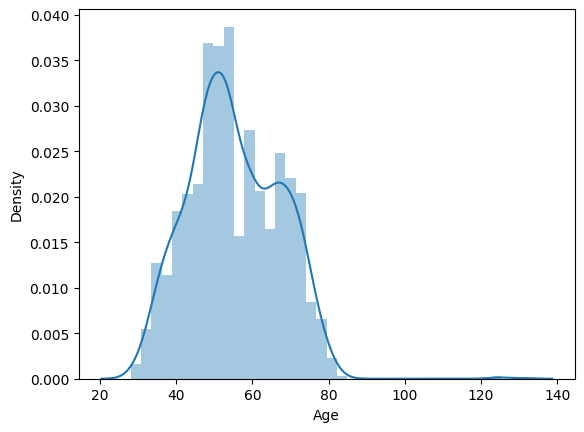

In [17]:
sns.distplot(dataset['Age'])
plt.show()

- Age is inbetween the 40 to 60

In [21]:
dataset['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


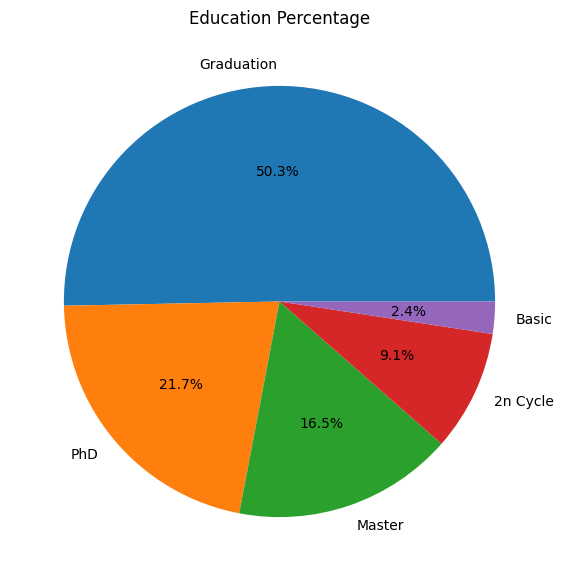

In [25]:
#plot pie chart
plt.figure(figsize=(7,7))
edu = dataset['Education'].value_counts()
plt.pie(edu, autopct = '%.1f%%', labels = [edu.index[0],edu.index[1],edu.index[2],edu.index[3],edu.index[4]])
plt.title('Education Percentage')
plt.show()

- Most of the customer had done there graduation

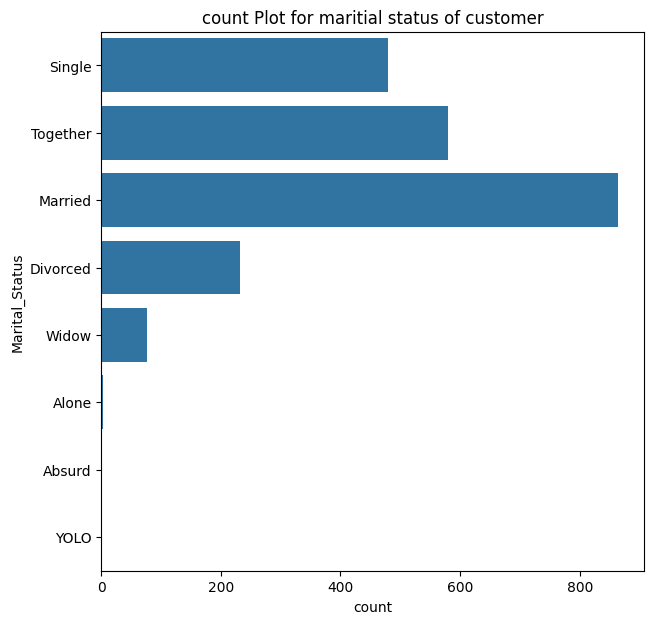

In [28]:
#Analysis Maritial Status
plt.figure(figsize=(7,7))
sns.countplot(dataset['Marital_Status'])
plt.title('count Plot for maritial status of customer')
plt.show()

- Its look that the married customers are more around 800+

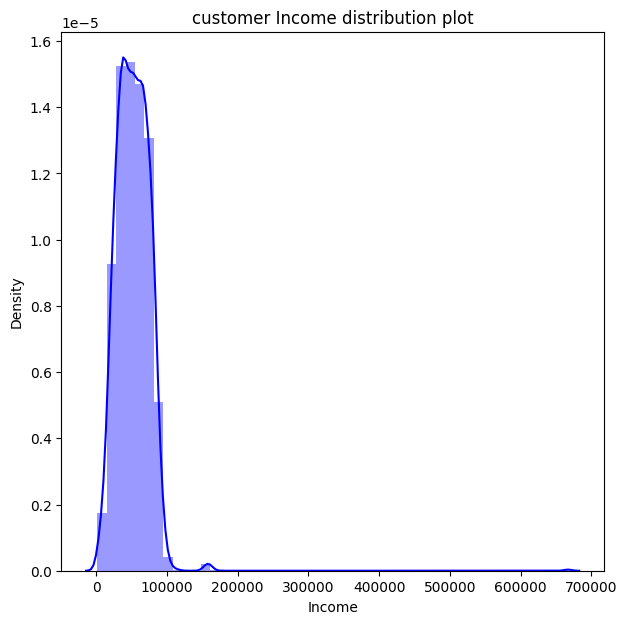

In [31]:
#Analyse the income of customer
plt.figure(figsize = (7,7))
sns.distplot(dataset['Income'], color = 'blue')
plt.title('customer Income distribution plot')
plt.show()


- We observed that the maximum customer income is between 0 to 100000